# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [35]:
# import data
df = pd.read_csv('../data/breast_cancer_wisconsin.csv')
df.sample(5)

ID  clump_thickness  uniformity_of_cell_size  \
119  1173681                3                        2   
210  1219525                8                       10   
682  1371920                5                        1   
72   1124651                1                        3   
317   709287                6                        8   

     uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
119                         1                  1                            2   
210                        10                 10                            5   
682                         1                  1                            2   
72                          3                  2                            2   
317                         7                  8                            6   

    bare_nuclei  bland_chromatin  normal_nucleoli  mitoses  class  
119           2                3                1        1      2  
210          10                8               10        6      4  
682           1                3                2        1      2  
72            1                7                2        1      2  
317           8                8                9        1      4

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [3]:
#check for nulls in the data
df.isnull().sum()

ID                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [4]:
#check for na in the data
df.isna().sum()

ID                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

There are no nulls/missing values

In [5]:
#check for duplicates in the data
df.duplicated().sum()

8

In [6]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

#describe the data
df.describe().T

count          mean            std      min  \
ID                           691.0  1.073333e+06  619295.297098  61634.0   
clump_thickness              691.0  4.426918e+00       2.815861      1.0   
uniformity_of_cell_size      691.0  3.130246e+00       3.041328      1.0   
uniformity_of_cell_shape     691.0  3.201158e+00       2.959886      1.0   
marginal_adhesion            691.0  2.824891e+00       2.866552      1.0   
single_epithelial_cell_size  691.0  3.211288e+00       2.199852      1.0   
bland_chromatin              691.0  3.435601e+00       2.442345      1.0   
normal_nucleoli              691.0  2.882779e+00       3.066298      1.0   
mitoses                      691.0  1.593343e+00       1.723129      1.0   
class                        691.0  2.688857e+00       0.951051      2.0   

                                  25%        50%        75%         max  
ID                           872549.0  1171710.0  1238437.0  13454352.0  
clump_thickness                   2.0        4.0        6.0        10.0  
uniformity_of_cell_size           1.0        1.0        5.0        10.0  
uniformity_of_cell_shape          1.0        1.0        5.0        10.0  
marginal_adhesion                 1.0        1.0        4.0        10.0  
single_epithelial_cell_size       2.0        2.0        4.0        10.0  
bland_chromatin                   2.0        3.0        5.0        10.0  
normal_nucleoli                   1.0        1.0        4.0        10.0  
mitoses                           1.0        1.0        1.0        10.0  
class                             2.0        2.0        4.0         4.0

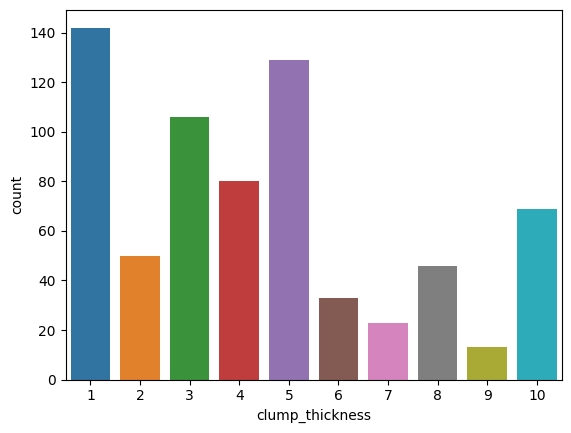

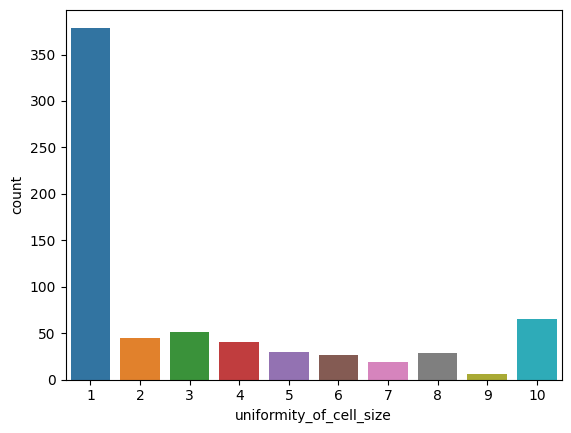

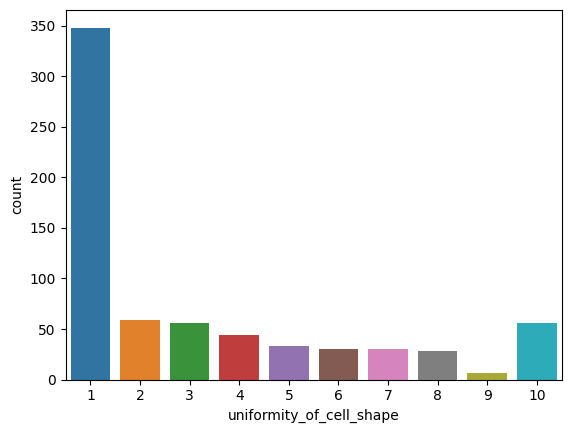

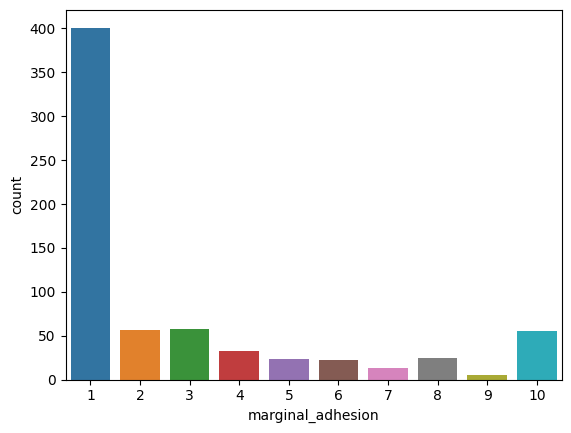

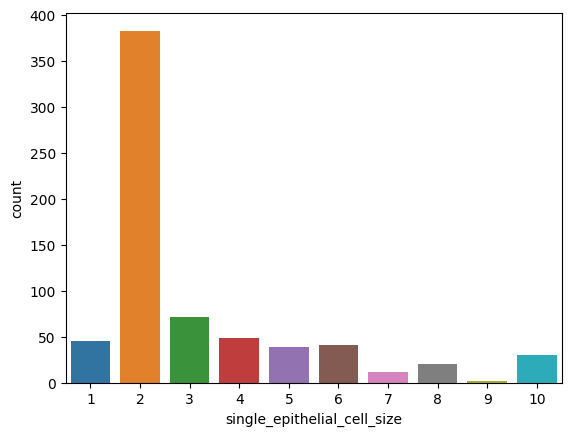

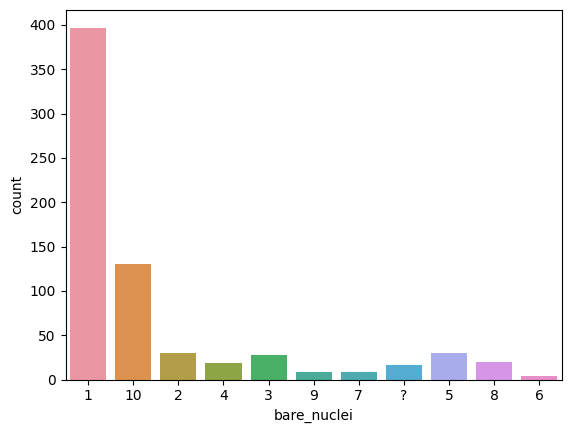

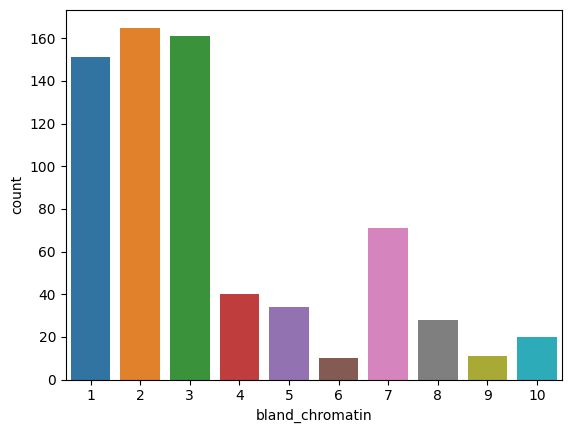

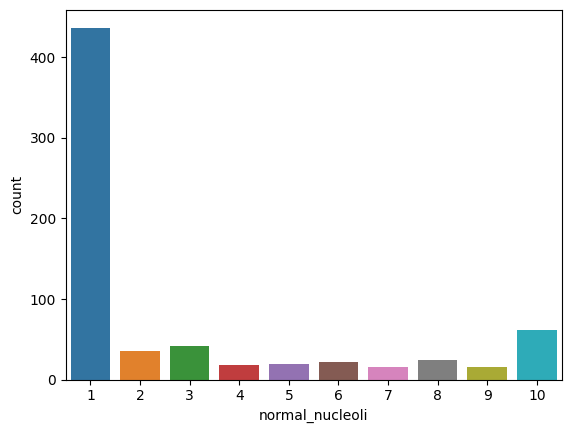

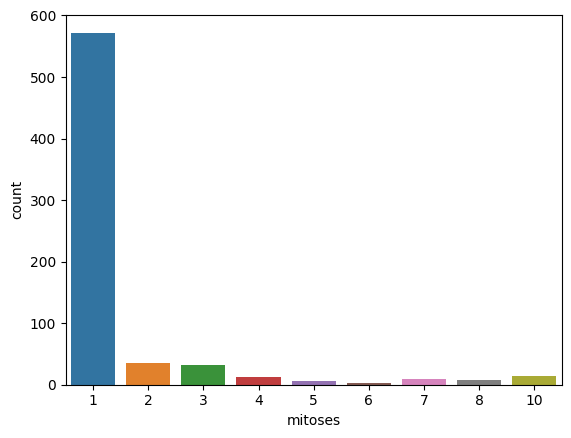

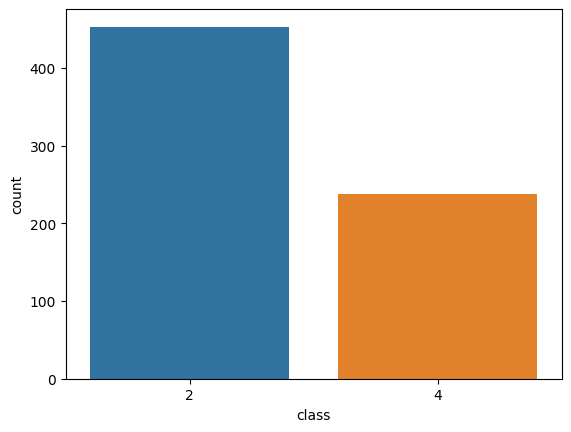

In [8]:
#function for count plot of one column
def count_plot(data, column):
    sns.countplot(x=column, data=data)
    plt.show()

#drop ID column
df_no_ID = df.drop('ID', axis=1).copy()

#for loop to plot count plot for each column
for column in df_no_ID.columns:
    count_plot(df_no_ID, column)    

In [9]:
df_no_ID['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
#replace a value
df_no_ID['bare_nuclei'] = df_no_ID['bare_nuclei'].replace('?', 0)

#convert to int
df_no_ID['bare_nuclei'] = df_no_ID['bare_nuclei'].astype(int)

#note the spread of the classes
df_no_ID['class'].value_counts(normalize=True)

2    0.655572
4    0.344428
Name: class, dtype: float64

In [20]:
#splitting the data as independent and dependent variables
X = df_no_ID.drop('class', axis=1)
y = df_no_ID['class']

#replace the class with 0 and 1
y = y.replace({2 : 0, 4 : 1})

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y_train.value_counts(normalize=True)

0    0.656315
1    0.343685
Name: class, dtype: float64

In [21]:
y_train.value_counts(normalize=True)

0    0.656315
1    0.343685
Name: class, dtype: float64

# Decision Tree

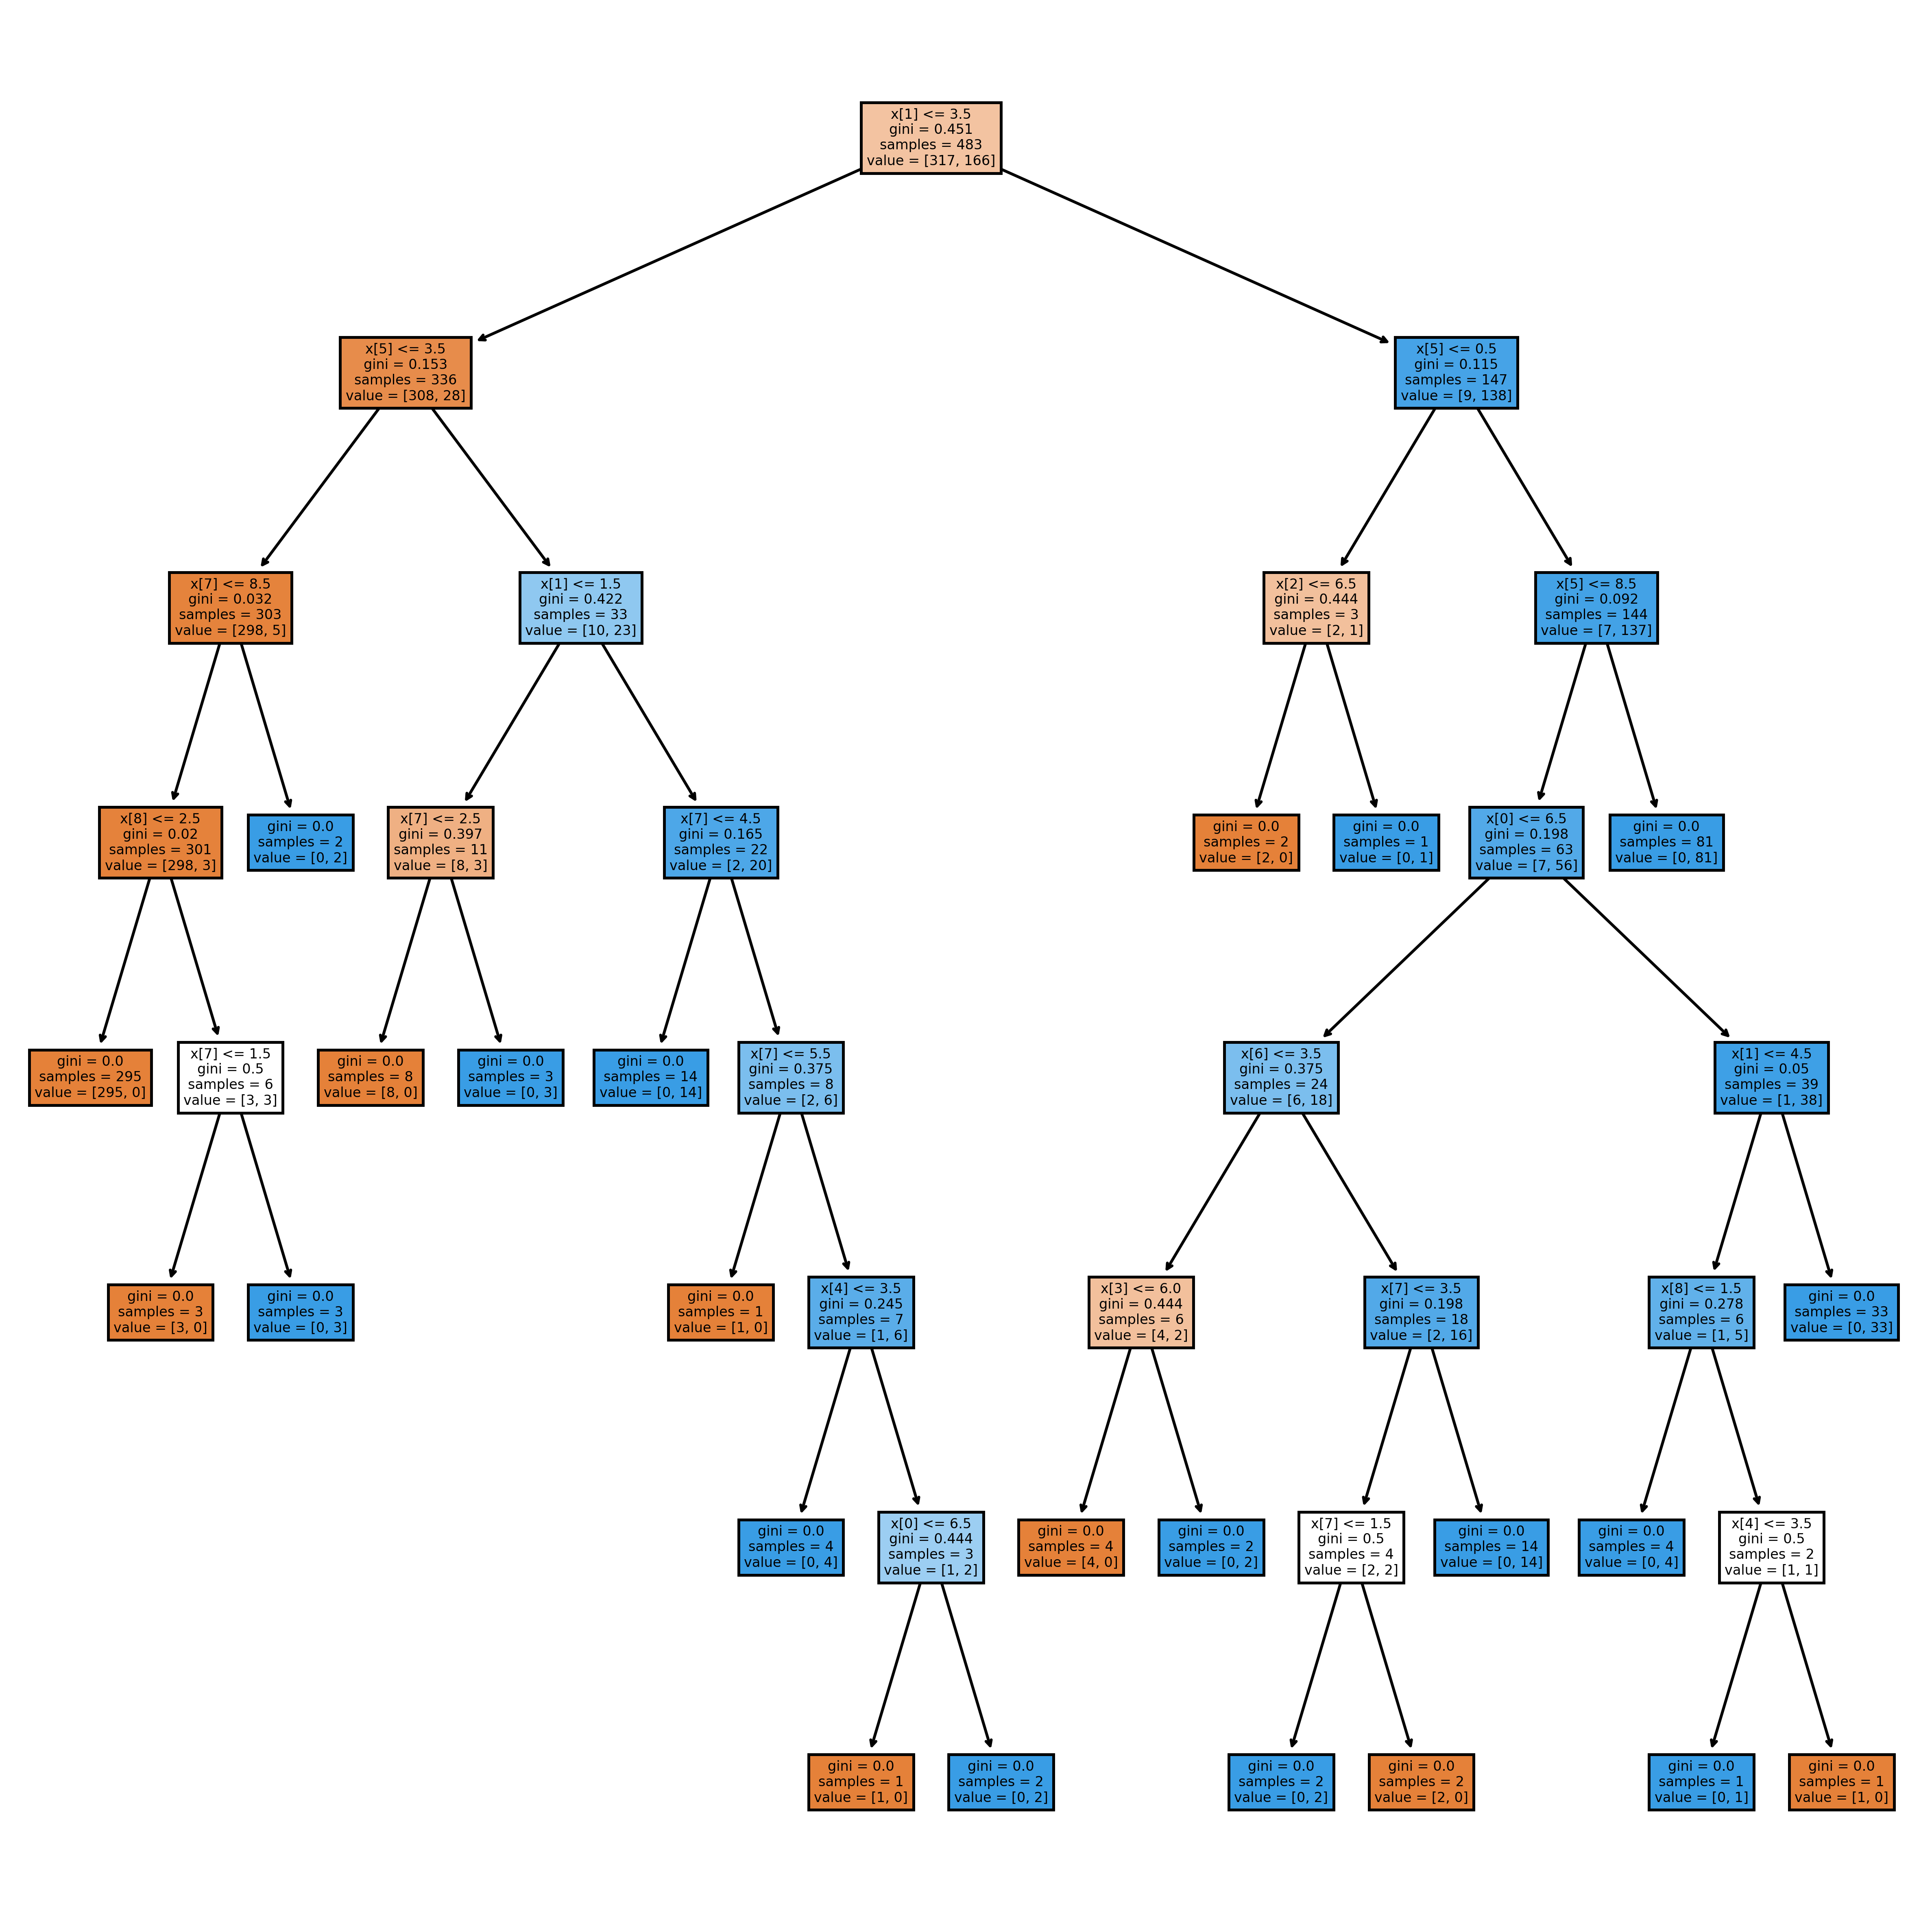

In [22]:
#Decision Tree
#create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

#fit data to model
dtc.fit(X_train, y_train)

#import libraries to plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plot the decision tree
plt.figure(figsize=(12, 12), dpi=500)
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



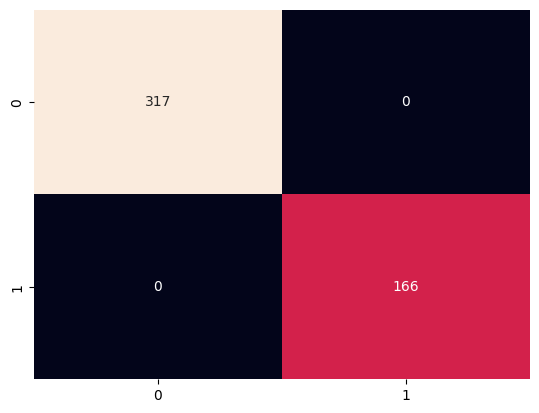

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       136
           1       0.93      0.88      0.90        72

    accuracy                           0.93       208
   macro avg       0.93      0.92      0.92       208
weighted avg       0.93      0.93      0.93       208



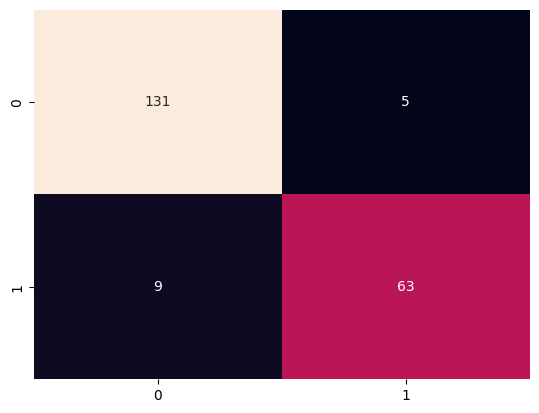

In [23]:
#import libraries to evaulate the model
from sklearn.metrics import classification_report, confusion_matrix

#evaluate the model
ytrain_pred = dtc.predict(X_train)

#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = dtc.predict(X_test)

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

In [24]:
#find cost complexity pruning path for the decision tree
path=dtc.cost_complexity_pruning_path(X_train, y_train)
alpha = path['ccp_alphas']

### Gridsearch

In [25]:
#import grid search
from sklearn.model_selection import GridSearchCV

#grid search for hyperparameter tuning on decision tree
param_grid = {'max_depth': np.arange(4,7),
              'min_samples_split': [5,7],
              'min_samples_leaf': [10],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_leaf_nodes': [10,12,16],
              'ccp_alpha': alpha}

#initialize the grid search object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)

#fit the data to the grid search object
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#best parameters
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


/home/sarangm/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/sarangm/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/sarangm/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/sarangm/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

{'ccp_alpha': 0.0013448709100883003, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}


/home/sarangm/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


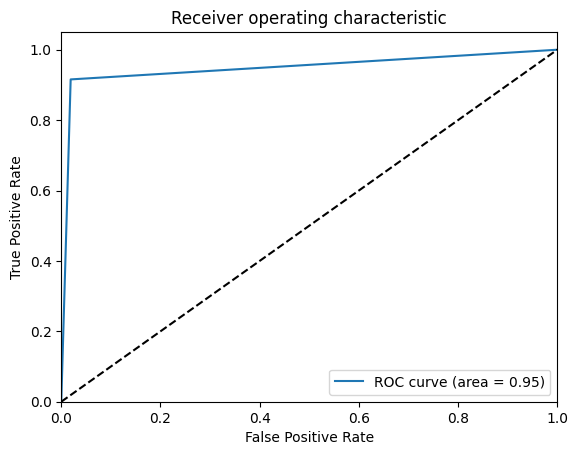

------------------------------------------------------


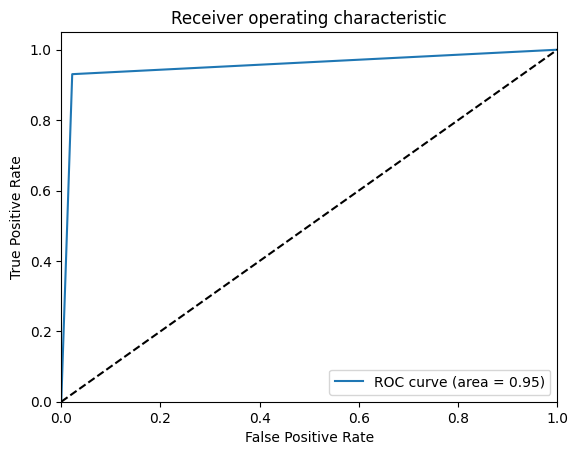

In [26]:
#import libraries to evaulate the model
from sklearn.metrics import roc_curve, roc_auc_score

#evaluate the model
ytrain_pred = best_model.predict(X_train)

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = best_model.predict(X_test)

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       317
           1       0.96      0.92      0.94       166

    accuracy                           0.96       483
   macro avg       0.96      0.95      0.95       483
weighted avg       0.96      0.96      0.96       483



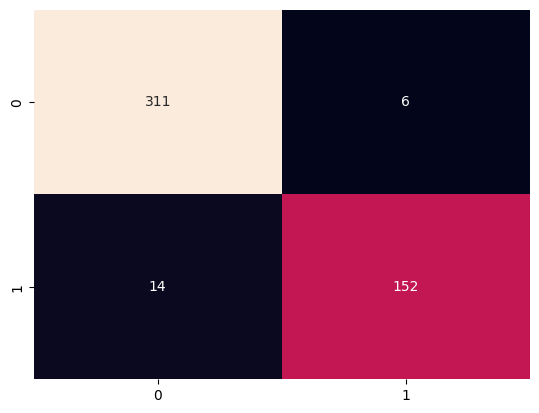

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.96      0.93      0.94        72

    accuracy                           0.96       208
   macro avg       0.96      0.95      0.96       208
weighted avg       0.96      0.96      0.96       208



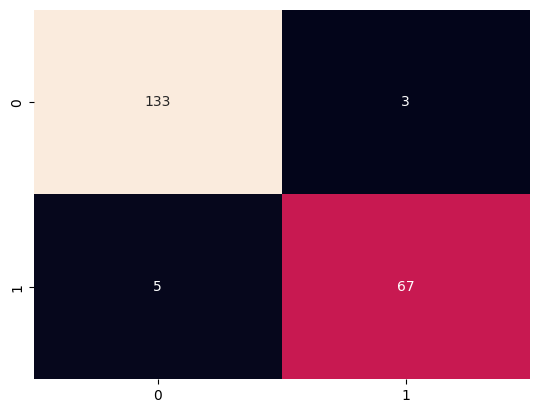

In [27]:
#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

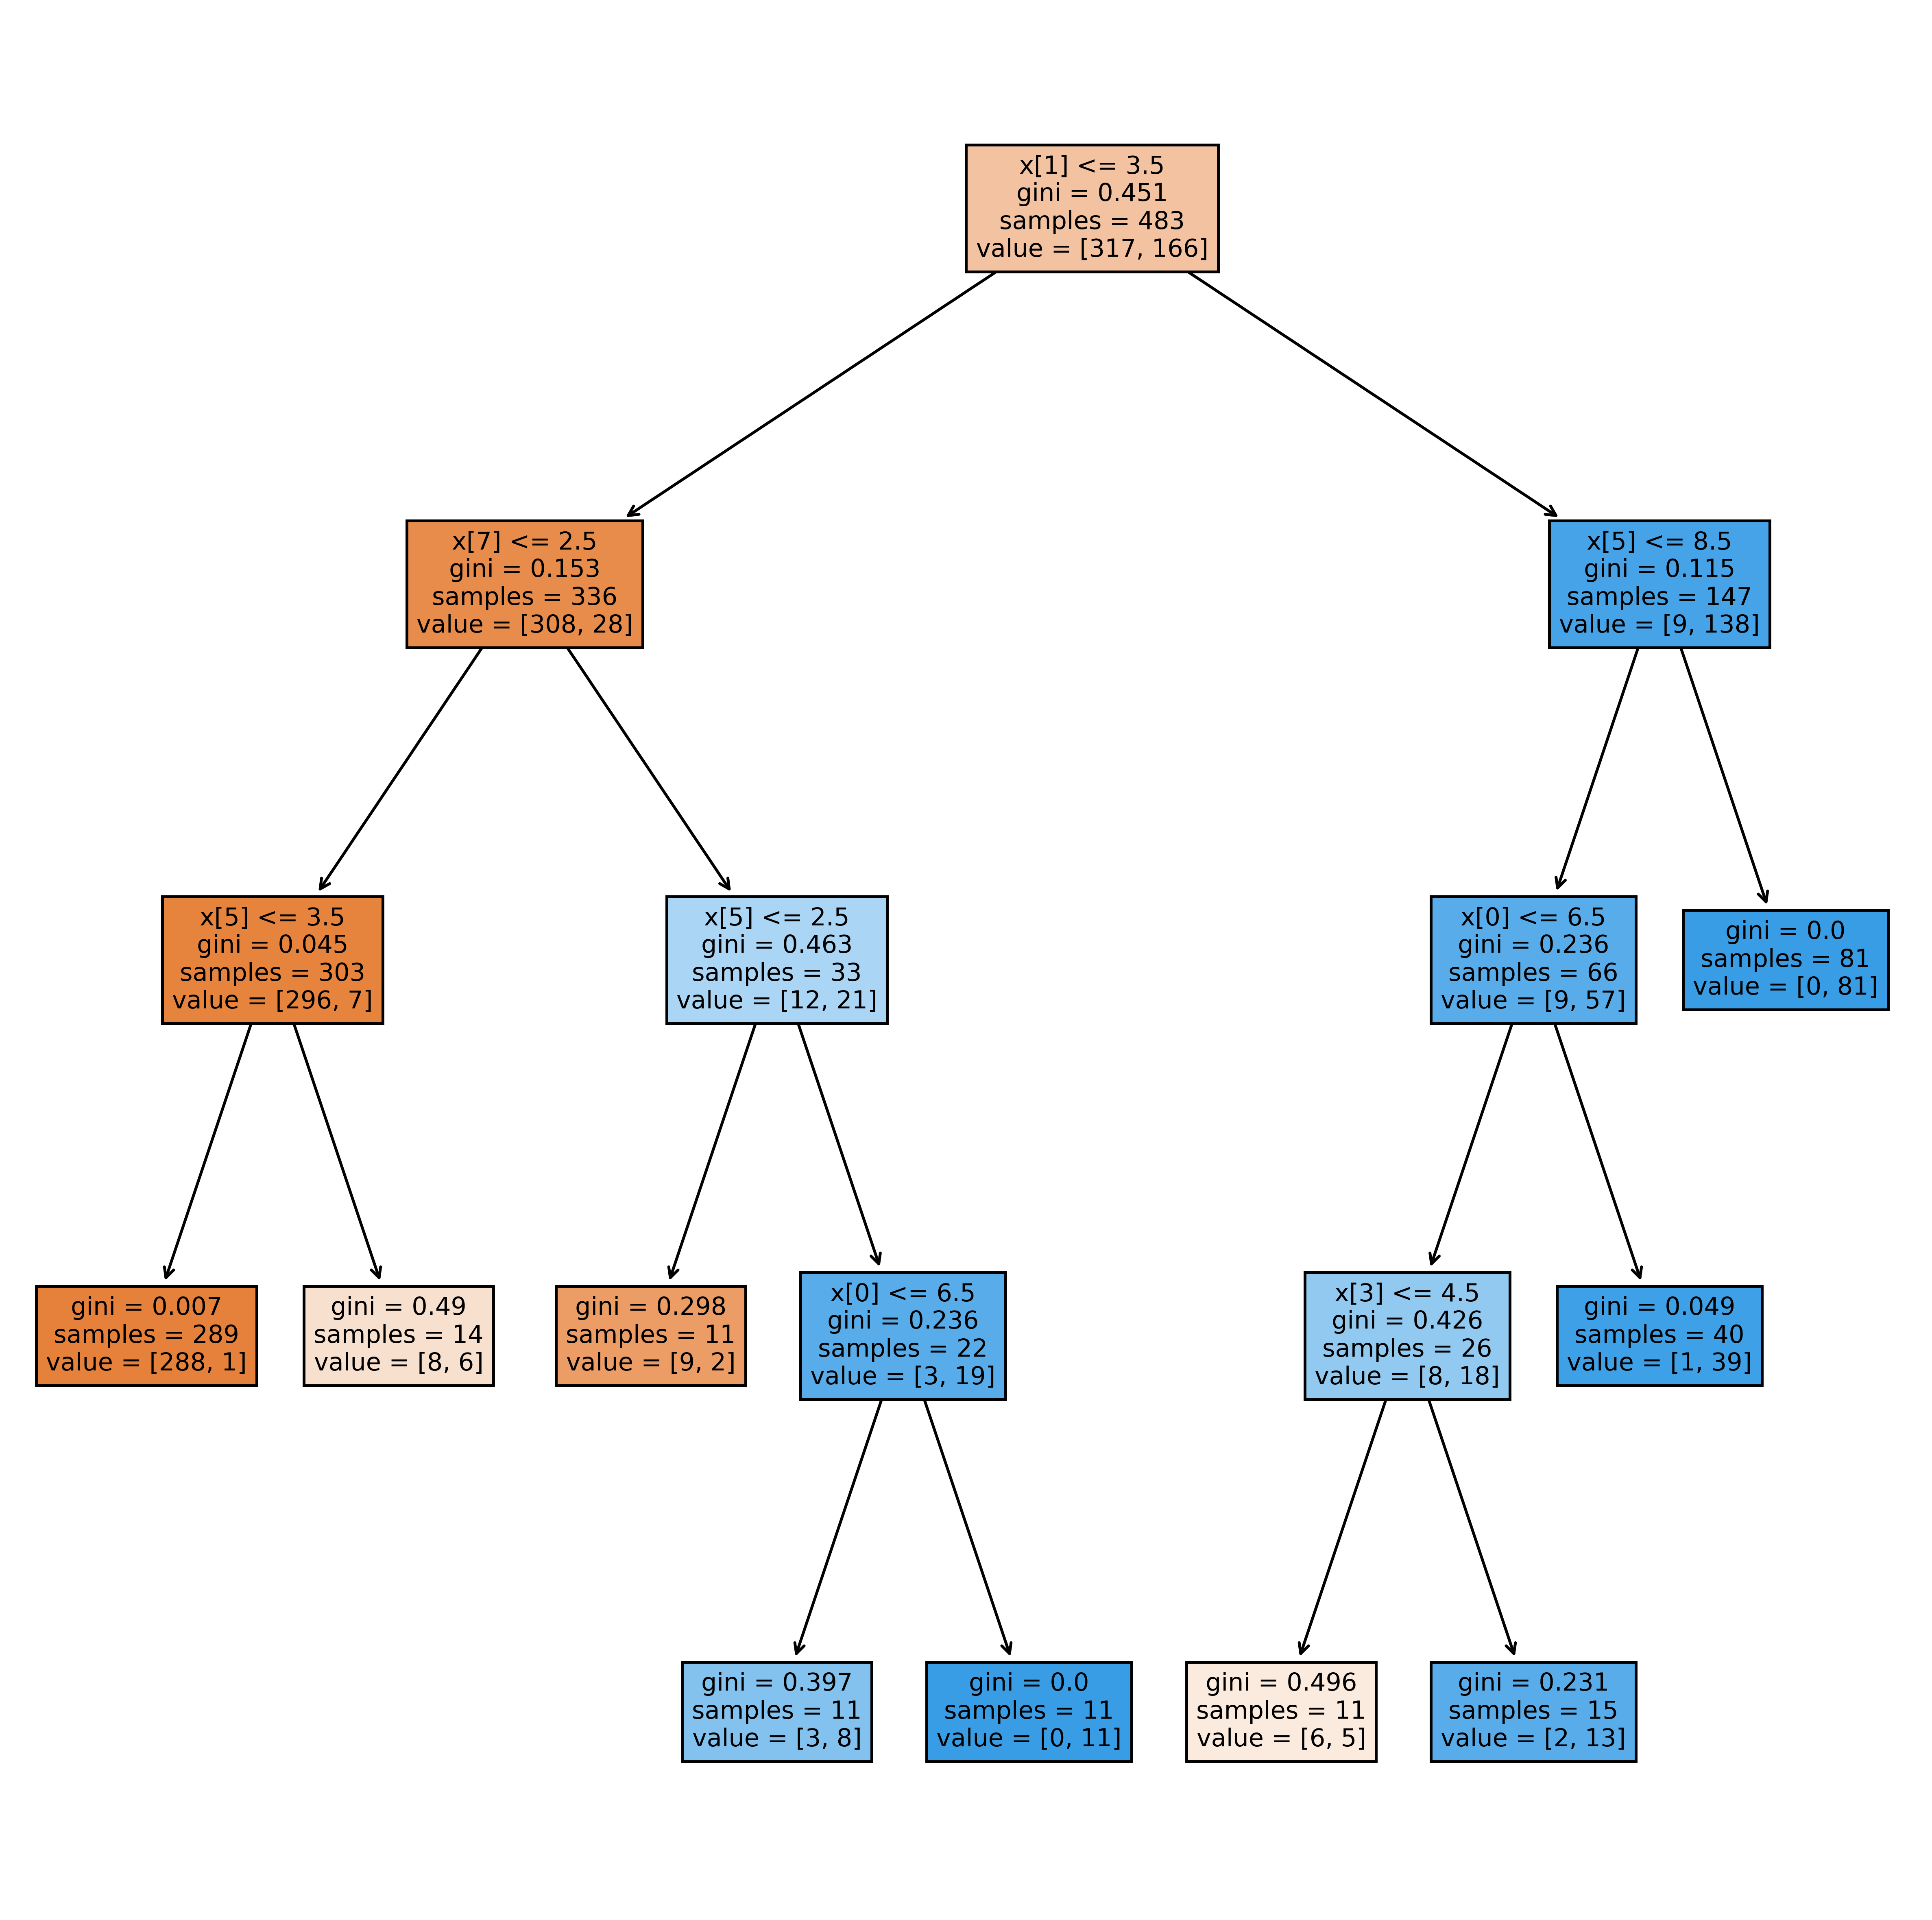

In [28]:
#plot the decision tree
plt.figure(figsize=(12, 12), dpi=500)
plot_tree(best_model, filled=True)
plt.show()

# Random Forest

In [29]:
#Random Forest
#create a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

#fit data to model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



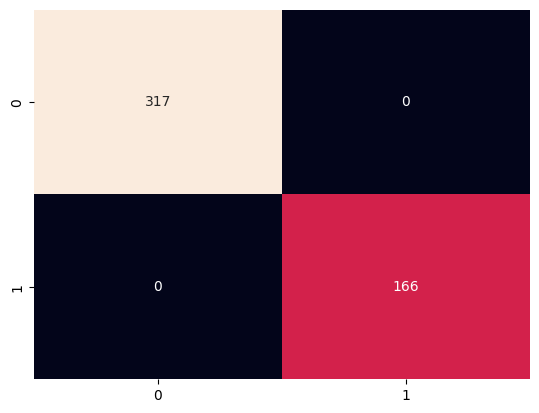

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       136
           1       0.95      0.96      0.95        72

    accuracy                           0.97       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.97      0.97      0.97       208



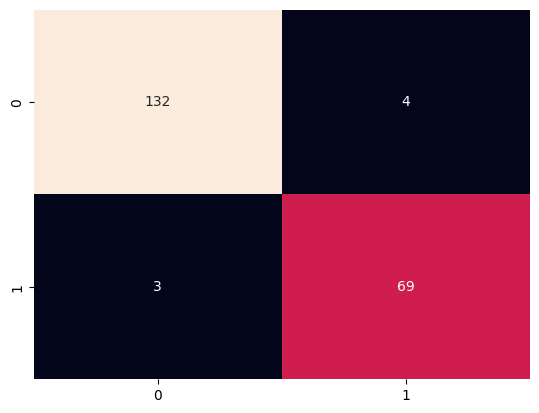

In [30]:
#evaluate the model
ytrain_pred = rfc.predict(X_train)

#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = rfc.predict(X_test)

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

### Gridsearch

In [32]:
#grid search for hyperparameter tuning on Random forest
param_grid = {'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'n_estimators': np.arange(10,200,20),
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_jobs': [-1],
              'oob_score': [True, False],
              'verbose' : [1],
              'warm_start': [True, False]}

#initialize the grid search object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)

#fit the data to the grid search object
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#best parameters
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 912 candidates, totalling 4560 fits


/home/sarangm/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/sarangm/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTree

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 90, 'n_jobs': -1, 'oob_score': False, 'verbose': 1, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.1s finished


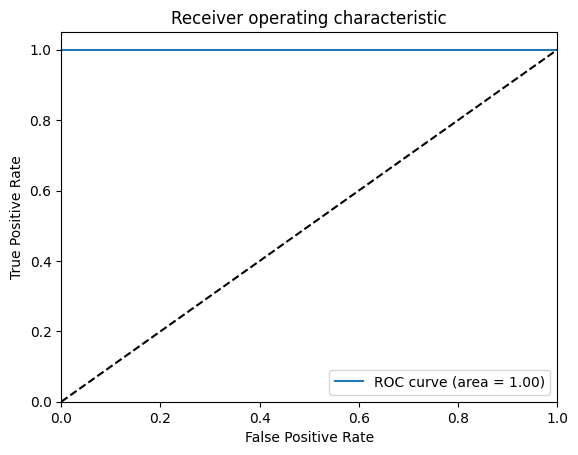

------------------------------------------------------


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.0s finished


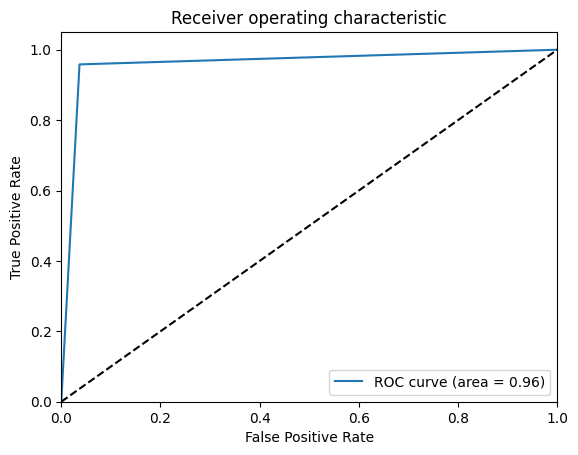

In [33]:
#evaluate the model
ytrain_pred = best_model.predict(X_train)

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = best_model.predict(X_test)

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



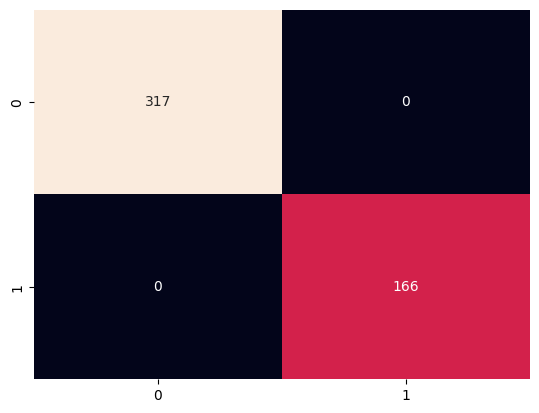

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.93      0.96      0.95        72

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208



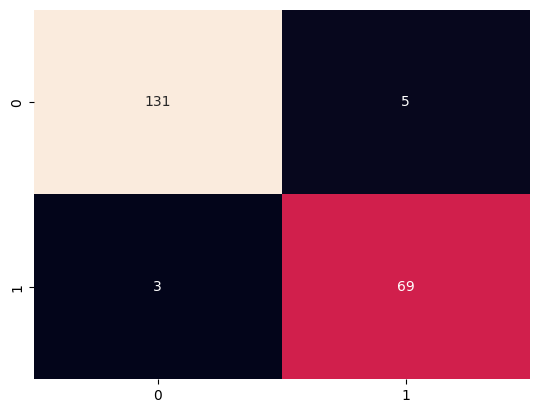

In [34]:
#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()